<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Ярослав!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

<div class="alert alert-info">
    <font size="4", color = "black">✍Привет! Спасибо за ревью! Бегу смотреть и исправлять ошибки)Мои комментарии будут на синем фоне</font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

## Описание проекта
Заказчик исследования - сеть отелей "Как в гостях". Необходимо разработать модель машинного обучния, способную эффективно предсказывать отказ от брони. В случае, если модель предсказывает отказ, клиенту придется внести депозит 80% от стоимости за сутки и стоимость уборки. 
Ключевая метрика - прибыль компании.
## Цели
1. Разработать систему прогнозирования отказа от брони.
2. Данная система должна окупиться за тестовый период.
## Описание данных
* id — номер записи;
* adults — количество взрослых постояльцев;
* arrival_date_year — год заезда;
* arrival_date_month — месяц заезда;
* arrival_date_week_number — неделя заезда;
* arrival_date_day_of_month — день заезда;
* babies — количество младенцев;
* booking_changes — количество изменений параметров заказа;
* children — количество детей от 3 до 14 лет;
* country — гражданство постояльца;
* customer_type — тип заказчика:
* Contract — договор с юридическим лицом;
* Group — групповой заезд;
* Transient — не связано с договором или групповым заездом;
* Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
* days_in_waiting_list — сколько дней заказ ожидал подтверждения;
* distribution_channel — канал дистрибуции заказа;
* is_canceled — отмена заказа;
* is_repeated_guest — признак того, что гость бронирует номер второй раз;
* lead_time — количество дней между датой бронирования и датой прибытия;
* meal — опции заказа:
* SC — нет дополнительных опций;
* BB — включён завтрак;
* HB — включён завтрак и обед;
* FB — включён завтрак, обед и ужин.
* previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
* previous_cancellations — количество отменённых заказов у клиента;
* required_car_parking_spaces — необходимость места для автомобиля;
* reserved_room_type — тип забронированной комнаты;
* stays_in_weekend_nights — количество ночей в выходные дни;
* stays_in_week_nights — количество ночей в будние дни;
* total_nights — общее количество ночей;
* total_of_special_requests — количество специальных отметок.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий.

## Шаг 1. Откройте файлы с данными

### Импорт библиотек необходимых для анализа

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    recall_score, 
    precision_score,
    f1_score,
    classification_report,
    roc_curve, 
    roc_auc_score,
    confusion_matrix, 
    ConfusionMatrixDisplay
) 

<div class="alert alert-info">
    <font size="4", color = "black"> Немного не понял, что в импортах не соответствует PEP-8 (</font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

### Пользовательские функции

In [2]:
def seson_coef(row):
    month = row['arrival_date_month']
    if month in ['December', 'January', 'February']:
        return 1
    elif month in ['March', 'April', 'May','September', 'October', 'November']:
        return 1.2
    elif month in ['June','July', 'August' ]:
        return 1.4

def room_price(row):
    if row['reserved_room_type'] == 'A':
        return 1000
    elif row['reserved_room_type'] == 'B':
        return 800
    elif row['reserved_room_type'] == 'C':
        return 600
    elif row['reserved_room_type'] == 'D':
        return 550
    elif row['reserved_room_type'] == 'E':
        return 500
    elif row['reserved_room_type'] == 'F':
        return 450
    elif row['reserved_room_type'] == 'G':
        return 350

def service_price(row):
    service_price_list = {
        'A': 400, 
        'B': 350,
        'C': 350,
        'D': 150,
        'E': 150,
        'F': 150,
        'G': 150
        
    }
    return service_price_list[row['reserved_room_type']]

def features_scalling(features_train, features_valid, features_test):
    scaler = StandardScaler()
    numeric_columns = list(features_train.dtypes.loc[(features_train.dtypes == 'float64') | \
         (features_train.dtypes == 'int64') | (features_train.dtypes == 'int32') | \
                                                     (features_train.dtypes == 'uint8')].index)
    scaler.fit(features_train.loc[:, numeric_columns])
    features_train.loc[:, numeric_columns] = pd.DataFrame(scaler.transform(features_train.loc[:, numeric_columns]),\
                                    index=features_train.index, columns=numeric_columns)
    features_valid.loc[:, numeric_columns] = pd.DataFrame(scaler.transform(features_valid.loc[:, numeric_columns]),\
                                     index=features_valid.index, columns=numeric_columns)
    features_test.loc[:, numeric_columns] = pd.DataFrame(scaler.transform(features_test.loc[:, numeric_columns]), \
                                     index=features_test.index, columns=numeric_columns)
    return features_train, features_valid, features_test

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Стоит учитывать рекомендации PEP-8 при оформлении проекта, в том числе импортов. С ними можно познакомиться по ссылке: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

In [3]:
#Настройка pandas
pd.set_option('display.max_columns', None)

### Загрузка данных

In [4]:
#open dataset
pth1 = '/datasets/'
pth2 = 'datasets/'

if os.path.exists(pth1):
    try:
        data_train = pd.read_csv('/datasets/hotel_train.csv')
        data_test = pd.read_csv('/datasets/hotel_test.csv')
        print('Датасет успешно считан')
    except:
        print('Возникли проблемы с чтением файлов 1')
elif os.path.exists(pth2):
    try:
        data_train = pd.read_csv('datasets/hotel_train.csv')
        data_test = pd.read_csv('datasets/hotel_test.csv')
        print('Датасет успешно считан')
    except:
        print('Возникли проблемы с чтением файлов 2')
else:
    print('Не найдена необходимая директория')

Датасет успешно считан


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что используешь конструкцию try/except для загрузки данных.

## Шаг 2. Предобработка и исследовательский анализ данных

### Проверка утверждений

Перед началом исследовательского анализа данных проверим следующие утверждения?
1. Столбец id уникален для data_train, data_test
2. Индексы id в data_train и data_test не имеют пересечений

In [5]:
print(f'Количество дубликатов в столбце id data_train: {data_train.duplicated().sum()}\n\
Количество дубликатов в столбце id data_test: {data_test.duplicated().sum()}\n\
id data_train и id data_test не имеют пересечений: {set(data_train.id).isdisjoint(set(data_test.id))}')

Количество дубликатов в столбце id data_train: 0
Количество дубликатов в столбце id data_test: 0
id data_train и id data_test не имеют пересечений: True


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь данные на дубликаты.

Действительно, id уникален для каждого из датасетов. и не имеет пересечений между собой.
1. Запомним индексы (id) каждого из датасетов
2. Объединим данные в один большой датасет, проведем исследовательский анализ данных и обработку.
3. Затем снова разъединим их на обучающий и проверочный датасет перед началом машинного обучения

In [6]:
data_train = data_train.set_index('id')
data_test = data_test.set_index('id')

In [7]:
train_indexes = data_train.index
test_indexes = data_test.index

In [8]:
data = pd.concat([data_train, data_test])

###  Пропуски в датасетах

Далее проверим данные на наличие пропусков

In [9]:
print(f'Суммарное количество пропусков во всем датасете: {data.isna().sum().sum()}')

Суммарное количество пропусков во всем датасете: 0


Пропусков нет вовсе.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь данные на пропуски.

### Сезонные коэффициенты

Добавим столбец season_coef со значениями:
1.4 - лето
1.2 - осень, весна
1 - зима

In [10]:
data['season_coef'] = data.apply(lambda row: seson_coef(row), axis=1)
data.season_coef.unique()

array([1.4, 1.2, 1. ])

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Пользовательские функции можно перенести в начало проекта после импортов и констант.

<div class="alert alert-info">
    <font size="4", color = "black"> Сделано</font>
    <br /> 
    <font size="3", color = "black">
<br /> 

### Стоимость номера за ночь и обслуживания

In [11]:
data.reserved_room_type = data.reserved_room_type.str.replace(' ', '')

In [12]:
data['room_price'] = data.apply(lambda row: room_price(row), axis=1)
data.room_price.unique()

array([1000,  600,  550,  500,  350,  450,  800])

В датасете есть три взаимосвязанных колонки:
stays_in_weekend_nights, stays_in_week_nights, total_nights
Логика подсказывает, что:
$$
stays\_in\_weekend\_nights + stays\_in\_week\_nights =total\_nights
$$
Проверим, так ли это

In [13]:
(data.stays_in_week_nights + data.stays_in_weekend_nights == data.total_nights).unique()

array([ True])

Чтобы не попасть в дамми ловушку, столбец total night необходимо удалить

In [14]:
data = data.drop('total_nights', axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, все верно.
        

Вычислим для каждого гостя стоимость обслуживания за все время пребывания

In [15]:
data['service_price'] = data.apply(lambda row: service_price(row), axis=1)


### Выручка компании и прибыль

Создадим столбец revenue и profit. С полной выручкой и прибылью

In [16]:
data['revenue'] = (data.stays_in_week_nights + data.stays_in_weekend_nights) *\
    data.room_price * data.season_coef * (1 - data.is_canceled)
data['profit'] = (1 - data.is_canceled) * (data.revenue - data.service_price - \
    data.service_price * ((data.stays_in_week_nights + data.stays_in_weekend_nights) // 2)) \
    - data.is_canceled * (data.service_price + data.room_price * data.season_coef)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Расчеты верные.

### Корреляция

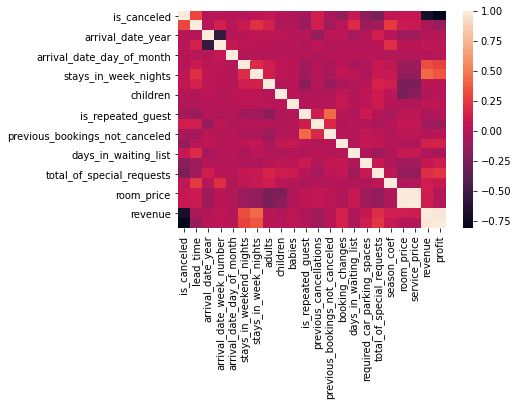

In [17]:
sns.heatmap(data.corr());

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

1. Для расчета корреляций с учетом категориальных признаков стоит использовать инструменты, рассчитанные на это, например, https://phik.readthedocs.io/en/latest/
    
2. Коэффициент корреляции Пирсона (который по дефолту рассчитывается в методе corr), имеет определенные требования к данным:
    
- характер взаимосвязи двух переменных должен быть линейным и монотонным (коэффициент корреляции Пирсона не может уловить нелинейные зависимости). Поэтому, чтобы проконтроллировать корректность применения коэффициента корреляции Пирсона стоит сначала построить диаграммы рассеяния для переменных. 
    
- распределения обоих переменных, для которых рассчитывается коэффициент должны быть распределены нормально. То есть стоит построить графики распределений для переменных прежде чем изучать корреляцию. Также выбросы, ассиметрия, бимодальность негативно сказываются на адекватности использования среднего значения в качестве некоторого показателя, характеризующего нашу выборку (а коэффициент коррелиции Пирсона основан на среднем значении). Формулу можно посмотреть здесь:
    
https://studfile.net/preview/2966946/page:34/
    
Чтобы уменьшить негативное влияние выбросов можно перейти от коэффициента корреляции Пирсона к непараметрическому критерию корреляции - коэффициенту корреляции Спирмена, который уходит от реальных значенийи переходит к рангам.
    

<div class="alert alert-info">
    <font size="4", color = "black"> Попробую, код ниже. Добавлю импорт тут, надеюсь ничего страшного. Новые кусочки кода, между горизонтальными синими линиями</font>
    <br /> 
    <font size="3", color = "black">
<br /> 

<hr style="border: 2px solid blue;">

In [18]:
%%time
# Коэффициент корреляции Спирмена 
import phik
data.phik_matrix().style.background_gradient('coolwarm')

interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'season_coef', 'room_price', 'service_price', 'revenue', 'profit']
CPU times: user 8.55 s, sys: 86.1 ms, total: 8.64 s
Wall time: 8.69 s


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,season_coef,room_price,service_price,revenue,profit
is_canceled,1.000000,0.399017,0.046211,0.101049,0.098220,0.041515,0.012649,0.093030,0.064374,0.036007,0.027831,0.039506,0.456439,0.255593,0.109305,0.055497,0.051698,0.067139,0.094789,0.141788,0.191686,0.149562,0.378048,0.026779,0.058949,0.031911,0.890794,1.000000
lead_time,0.399017,1.000000,0.109029,0.333658,0.441189,0.131782,0.198839,0.240323,0.259485,0.041533,0.016639,0.216042,0.298300,0.262549,0.227617,0.083018,0.072300,0.104042,0.050610,0.333350,0.210551,0.154367,0.112132,0.339079,0.148129,0.032034,0.208344,0.429991
arrival_date_year,0.046211,0.109029,1.000000,0.547219,0.548534,0.040384,0.024355,0.041273,0.011625,0.018205,0.010761,0.068035,0.138954,0.029235,0.021585,0.019715,0.029793,0.056606,0.023071,0.163797,0.139025,0.023230,0.090733,0.077120,0.046624,0.027946,0.027739,0.058213
arrival_date_month,0.101049,0.333658,0.547219,1.000000,0.949675,0.138019,0.094722,0.122479,0.161870,0.131905,0.022203,0.152556,0.275048,0.149020,0.091030,0.075798,0.042051,0.086011,0.030726,0.153563,0.231308,0.033146,0.113762,1.000000,0.088317,0.067944,0.161402,0.303414
arrival_date_week_number,0.098220,0.441189,0.548534,0.949675,1.000000,0.296739,0.108564,0.104130,0.194336,0.093546,0.024256,0.185924,0.251494,0.111563,0.092071,0.060473,0.056743,0.077289,0.032631,0.199883,0.190374,0.039909,0.090594,0.911568,0.109750,0.070115,0.199711,0.365685
arrival_date_day_of_month,0.041515,0.131782,0.040384,0.138019,0.296739,1.000000,0.088407,0.070831,0.063118,0.020092,0.007417,0.120083,0.172525,0.050274,0.021427,0.054087,0.010680,0.029513,0.029912,0.157245,0.054261,0.016801,0.029785,0.088705,0.039219,0.016730,0.060797,0.054809
stays_in_weekend_nights,0.012649,0.198839,0.024355,0.094722,0.108564,0.088407,1.000000,0.478820,0.170230,0.026777,0.026451,0.110937,0.249173,0.080923,0.069656,0.024249,0.034746,0.090336,0.020625,0.101198,0.052255,0.027361,0.055540,0.054221,0.149430,0.029466,0.673419,0.658752
stays_in_week_nights,0.093030,0.240323,0.041273,0.122479,0.104130,0.070831,0.478820,1.000000,0.123046,0.033296,0.027483,0.120846,0.319439,0.147002,0.103757,0.048331,0.038429,0.195272,0.050756,0.095412,0.114358,0.043890,0.068073,0.109450,0.128269,0.038238,0.560296,0.632899
adults,0.064374,0.259485,0.011625,0.161870,0.194336,0.063118,0.170230,0.123046,1.000000,0.234382,0.055515,0.158515,0.233919,0.222262,0.157520,0.043487,0.137230,0.398662,0.054569,0.070260,0.101910,0.013277,0.131220,0.118893,0.603996,0.289748,0.123260,0.237642
children,0.036007,0.041533,0.018205,0.131905,0.093546,0.020092,0.026777,0.033296,0.234382,1.000000,0.027271,0.051180,0.134478,0.102674,0.044552,0.000000,0.000000,0.509828,0.048517,0.036379,0.127054,0.030301,0.116460,0.061452,0.389956,0.727380,0.061533,0.075572


<div class="alert alert-info">
    <font size="4", color = "black"> Действительно, появились категориальные параметры, сразу можно заметить связь отмены со страной. Буду пользоваться этим коэффициентом </font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

<hr style="border: 2px solid blue;">

Выводы:
1. Сильная линейная связь между выручкой и прибылью с клиента (не самый интересный факт, ввиду очевидности)
2. Средняя связь между прибылью и количеством дней в номере (тоже предсказумое)
3. Есть средняя связь между повторным бронированием и тем, что гость не отменял предыдущее бронирование

### Типы данных

Приведем данные к логичному типу

In [19]:
data.loc[:, ['adults', 'children', 'babies']] = data.loc[:, ['adults', 'children', 'babies']].astype('int')


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Также можно исследовать данные на аномальные значения.
        


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
        
Кроме того стоит убрать неявные дубликаты в строковых данных.


<div class="alert alert-info">
    <font size="4", color = "black">Приступаю</font>
    <br /> 
    <font size="3", color = "black">
<br />

<hr style="border: 2px solid blue;">

### Поиск аномальных значений

<div class="alert alert-info">
    <font size="4", color = "black"> Внимательно посмотрел свои гистограммы по данным типа int. Аномальными показались следующие значения: <br>
    1. 0 Взрослых <br>
    2. 9 или 10 младенцев</font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

In [20]:
data.adults.unique()

array([1, 2, 3, 4, 0])

In [21]:
data.babies.unique()

array([ 0,  1,  2, 10,  9])

In [22]:
print(f'Количесто строк, где 0 взрослых или младенцев больше 8: \
{len(data.loc[(data.adults  == 0) | (data.babies > 8)])} \n\
Доля относительно датасета: {len(data.loc[(data.adults  == 0) | (data.babies > 8)]) / len(data):.1%}')

Количесто строк, где 0 взрослых или младенцев больше 8: 237 
Доля относительно датасета: 0.2%


In [23]:
# Удаляем данные с аномальными значениями: 
data = data.loc[~((data.adults  == 0) | (data.babies > 8))]

### Поиск неявных дубликатов

In [24]:
pd.DataFrame({'Количество полных дубликатов': 
              [data.duplicated().sum(),data_train.duplicated().sum(),data_test.duplicated().sum() ],
              'Количество дубликатов без lead_time':  \
              [data.drop('lead_time', axis=1).duplicated().sum(),\
               data_train.drop('lead_time', axis=1).duplicated().sum(),\
               data_test.drop('lead_time', axis=1).duplicated().sum() ]}, 
             index=['data', 'data_train', 'data_test'])

,Количество полных дубликатов,Количество дубликатов без lead_time
data,29088,31532
data_train,21377,23080
data_test,7717,8458


<div class="alert alert-info">
    <font size="4", color = "black">Либо это ошибка, либо треть нашего датасета это дубликаты. Сбрасываю их</font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

In [25]:
data = data.loc[~data.drop('lead_time', axis=1).duplicated(keep='first')]

<hr style="border: 2px solid blue;">

### Распределение величин

#### float

Посмотрим как распределены вещественные параметры

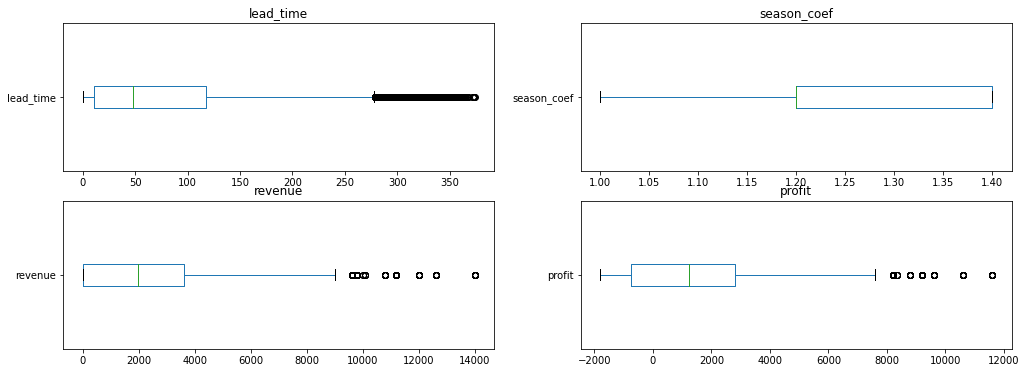

In [26]:
numeric_columns = list(data.dtypes.loc[(data.dtypes == 'float64')].index)
fig, ax = plt.subplots(2,2, figsize=(17, 6))
for index, column in enumerate(numeric_columns):
    data.loc[:, column].plot(kind='box', title=column, ax=ax[index //2, index % 2], vert=False)

#### object

Серьезных выбросов, не обнаружено

Исследуем распределение категориальных  переменных 

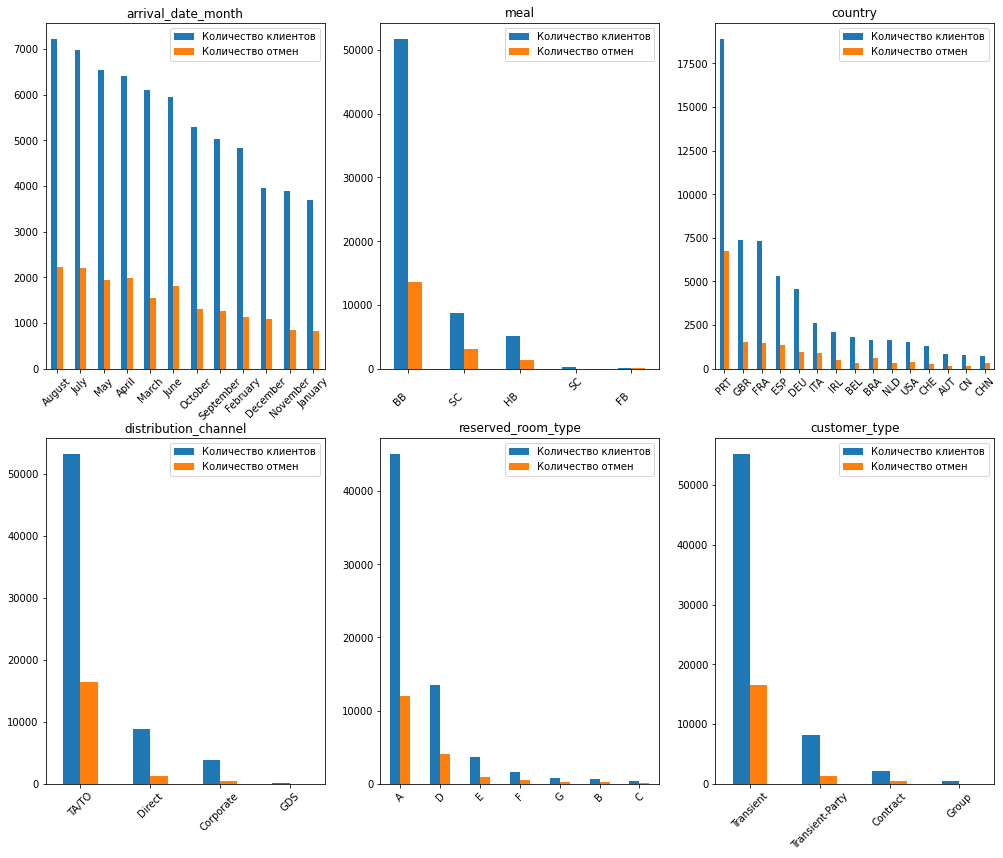

In [27]:
categorical_columns = list(data.dtypes.loc[(data.dtypes == 'object')].index)
fig, ax = plt.subplots(2,3, figsize=(17, 14))
for index, column in enumerate(categorical_columns[:]):
    data.loc[:, [column, 'is_canceled']]\
        .pivot_table(index=column, values='is_canceled', aggfunc=['count', 'sum'])\
            .sort_values(by=('count', 'is_canceled'), ascending=False)[:15]\
                .plot(kind='bar', legend=False, title=column, ax=ax[index // 3, index%3], rot=45, xlabel='')
    ax[index // 3, index%3].legend(['Количество клиентов', 'Количество отмен'])


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что анализируешь данные с точки зрения была отменена бронь или нет.

Анализируя полученные гистограммы можно сделать ряд выводов:
1. Сезонные коэффициенты выбраны логично
2. Наиболее популярный тип питания: BB = включен завтрак
3. Вероятно наш отель расположен в Португалии. Так как большинство туристов именно оттуда. Также отель пользуется популярностью у других Европейских стран. Визуально кажется, что Португальцы чаще других отменяют бронирование.
4. Чаще всего отель бронируют через турагента или туроператора (TA/ TO). Реже напрямую
5. Наиболее популярные тип номера "A" - наиболее дорогой
6. Чаще всего это бронирование не связано с договором или групповым заездом

#### int

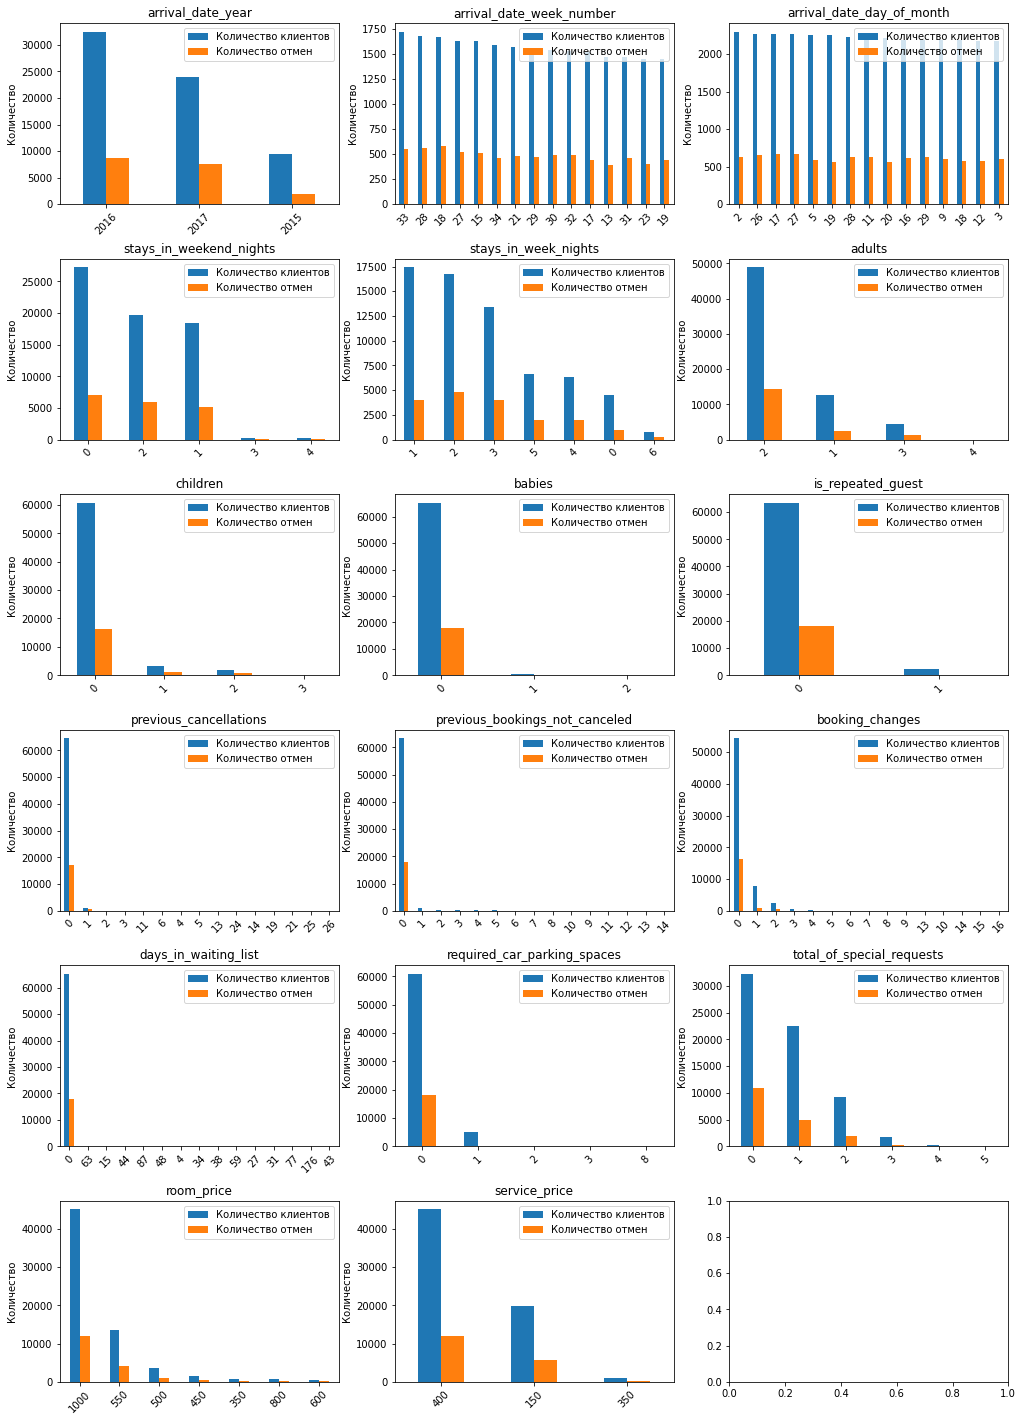

In [28]:
int_columns = list(data.dtypes.loc[(data.dtypes == 'int64')].index)[1:]
fig, ax = plt.subplots(len(int_columns)//3 + 1,3, figsize=(17, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for index, column in enumerate(int_columns):
    data.loc[:, [column, 'is_canceled']]\
        .pivot_table(index=column, values='is_canceled', aggfunc=['count', 'sum'])\
            .sort_values(by=('count', 'is_canceled'), ascending=False)[:15]\
                .plot(kind='bar', legend=False, title=column, ax=ax[index // 3, index%3], rot=45, xlabel='')
    ax[index // 3, index%3].legend(['Количество клиентов', 'Количество отмен'])
    ax[index // 3, index%3].set_ylabel('Количество')


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Также у всех графиков стоит добавить подписи осей, кроме того стоит расширить отступы мжеду ними, чтобы все было читаемо.

<div class="alert alert-info">
    <font size="4", color = "black">Добавил подпись к вертикальной оси, а горизонтальная <code>xlabel</code> будет лишь дублировать название <code>title</code></font>
    <br /> 
    <font size="3", color = "black">
<br /> 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь код выдает ошибку, пожалуйста, поправь.
    
Пока посмотрю дальше без аутпута

<div class="alert alert-info">
    <font size="4", color = "black">Крайне странно, я выполняю проект локально в Visual Code, там все работает и ничего не падает. Видимо разные версии питона или библиотек. <br>
        При этом как ни странно код выводит все гистограммы (что и должен) и выдает ошибку <br><br>
    P.S. Понял в чем ошибка, колонок 17, а сетка 5x3. Сделаю чтобы, сетка настраивалась автоматически
    </font>
    <br /> 
    <font size="3", color = "black">
<br /> ... , вот мой вопрос ...
        

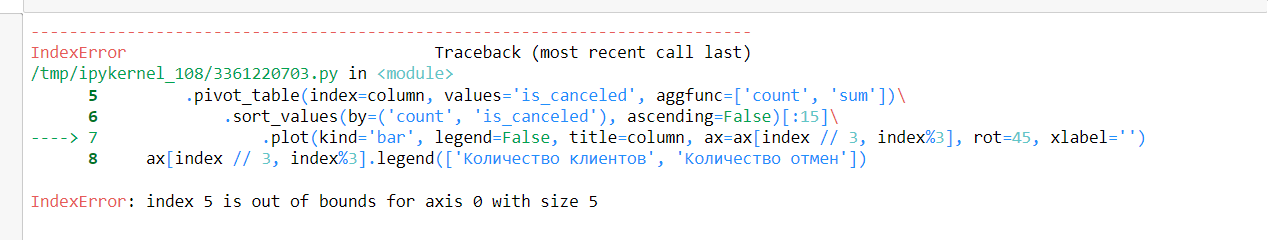

### Анализ портрета ненадежного заемщика

<div class="alert alert-info">
    <font size="4", color = "black">После сброса дубликатов многие выводы придется поправить. </font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        

#### Lead_time

Исследуем, как вероятность отмены зависит от времени до бронирования:
1. Поделим времена бронирования на децили.
2. Построим стобчатую гистограмму среднего значения `is_canceled` в каждом дециле.

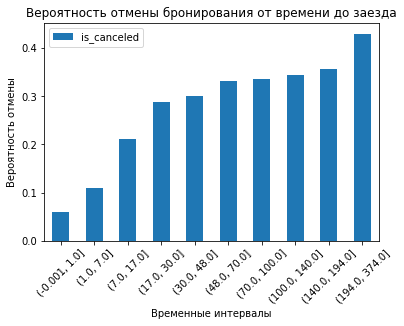

In [29]:
pd.concat([pd.qcut(data.lead_time, q=10), data.is_canceled],axis=1)\
    .pivot_table(index='lead_time', values='is_canceled')\
        .plot(kind='bar', rot=45, \
            title='Вероятность отмены бронирования от времени до заезда',\
                xlabel='Временные интервалы', ylabel='Вероятность отмены');

**Вероятность отмены брони растет с увеличением срока до заезда в отель**

#### arrival_date_month

Исследуем, как влияет месяц заезда на отмены

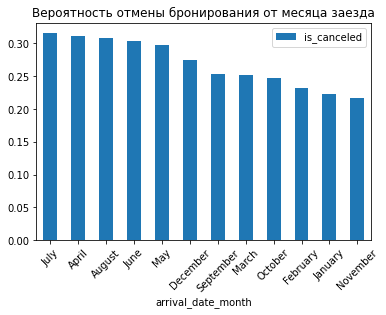

In [30]:
data.pivot_table(index='arrival_date_month', values='is_canceled', aggfunc='mean')\
    .sort_values(by='is_canceled', ascending=False)\
        .plot(kind='bar', rot=45, title='Вероятность отмены бронирования от месяца заезда');

**В сезонные месяцы вероятность отмены несколько выше, чем в зимний период**

#### adults, children, babies

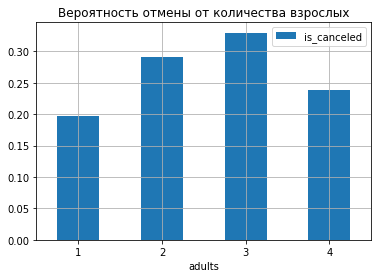

In [31]:
data.pivot_table(index='adults', values='is_canceled')\
    .plot(kind='bar', rot=0, grid=True, title='Вероятность отмены от количества взрослых');

In [32]:
data.pivot_table(index='adults', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
adults,,
1,0.197556,12604
2,0.291108,48920
3,0.329790,4327
4,0.238095,21


**Приезжающие парами отменяют бронирование чаще, по сравнению с одиночным заездом, при этом наиболее популярные варианты бронирования - 1 взрослый или 2 взрослых. По остальным категориям данных мало**

In [33]:
data.pivot_table(index='children', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
children,,
0,0.270947,60761
1,0.300476,3358
2,0.394374,1742
3,0.363636,11


**По количество детей достаточно сложно сделать вывод, подавляющее большинство гостей без детей**

In [34]:
data.pivot_table(index='babies', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
babies,,
0,0.276776,65255
1,0.167213,610
2,0.000000,7


**С младенцеми путешествуют редко, данных недостаточно для анализа**

#### meal

In [35]:
data.pivot_table(index='meal', values='is_canceled',  aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
meal,,
BB,0.263448,51642
FB,0.292683,164
HB,0.269998,5063
SC,0.156522,230
SC,0.354155,8773


Наиболее популярные типы питания:
1. Включен завтра (BB)
2. Без дополнительных опций (SC)
3. Завтрак и обед (HB)
Сделаем анализ по ним

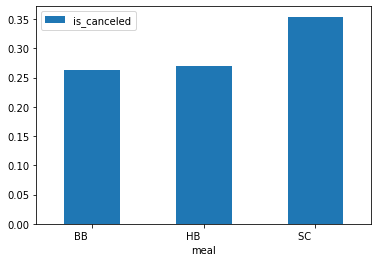

In [36]:
data.pivot_table(index='meal', values='is_canceled').iloc[[0,2,4]].plot(kind='bar', rot=0);

**Разница в типах питания несущественная**

#### country

В графе country много различных стран. При этом 95 % посетителей приходится на 16 стран. Анализируем их. 
Также это позволит не плодить огромное количество dummy переменных. 

In [37]:
popular_countries = data.country.value_counts(normalize=True)\
    .loc[data.country.value_counts(normalize=True).cumsum() < 0.95].index
popular_countries

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       'USA', 'CHE', 'AUT', 'CN', 'CHN', 'SWE', 'POL', 'RUS', 'NOR', 'ROU',
       'FIN', 'ISR', 'DNK', 'AUS', 'LUX'],
      dtype='object')

In [38]:
data.country = data.country.where(data.country.isin(popular_countries), 'non_popular')

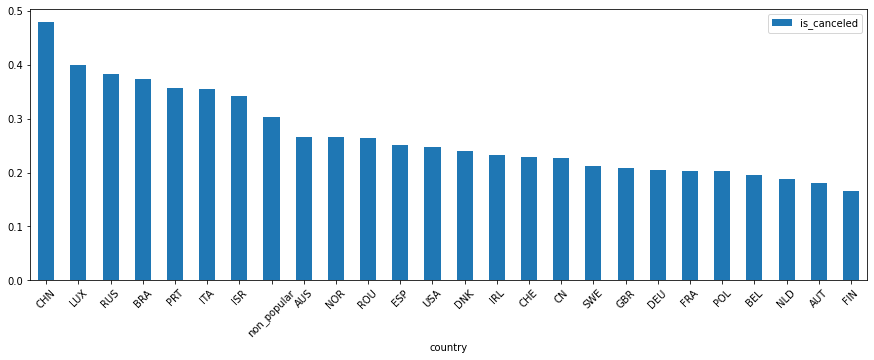

In [39]:
data.pivot_table(index='country', values='is_canceled')\
    .sort_values(by='is_canceled', ascending=False).plot(kind='bar', figsize=(15,5), rot=45);

**Чаще всех отменяют жители Китая и Бразилии**

#### distribution_channel

In [40]:
data.pivot_table(index='distribution_channel', values='is_canceled', aggfunc=['mean', 'count'])\
    .sort_values(by=('mean', 'is_canceled'), ascending=False)

,mean,count
,is_canceled,is_canceled
distribution_channel,,
TA/TO,0.308729,53108
GDS,0.181818,165
Direct,0.141397,8805
Corporate,0.129678,3794


**Наиболее популярный канал дистрибуции - через туроператора, по нему же чаще всего происходят отмены. Реже всего люди отменяют, если выбрали отель напрямую.**

#### is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes

In [41]:
data.loc[:, ['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', \
    'booking_changes', 'is_canceled']].corr()['is_canceled']\
        .to_frame().style.background_gradient('coolwarm')

,is_canceled
is_repeated_guest,-0.080984
previous_cancellations,0.051329
previous_bookings_not_canceled,-0.049375
booking_changes,-0.086643
is_canceled,1.000000


**Линейной зависимости между параметрами нет**

#### reserved_room_type

In [42]:
data.pivot_table(index='reserved_room_type', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
reserved_room_type,,
A,0.265851,45014
B,0.299301,715
C,0.297619,420
D,0.303811,13515
E,0.261622,3700
F,0.297167,1659
G,0.341578,849


**Чаще всего люди бронируют категории номеров A и D. При этом большая часть отмен бронирований приходится на номера типа А**

#### days_in_waiting_list

In [43]:
print(f'Количество клиентов, ожидающих подтверждение больше 0 дней: {(data.days_in_waiting_list != 0).sum()}')

Количество клиентов, ожидающих подтверждение больше 0 дней: 655


Количество клиентов, ожидающих подтверждение больше 0 дней совсем немного в рамках нашего датасета. Сравним их с основной группой, получающих подвтерждение сразу

In [44]:
waiting = data.query('days_in_waiting_list != 0').is_canceled.mean()
non_waiting = data.query('days_in_waiting_list == 0').is_canceled.mean()
print(f'Отмен бронирований среди получающих подтверждение бронирования с задержкой: {waiting:.1%}\n\
Отмен бронирований среди получающих подтверждение бронирования без задержки: {non_waiting:.1%}')

Отмен бронирований среди получающих подтверждение бронирования с задержкой: 39.2%
Отмен бронирований среди получающих подтверждение бронирования без задержки: 27.5%


**Пользователей лучше не заставлять ждать - им это не нравится**

#### customer_type

In [45]:
data.pivot_table(index='customer_type', values='is_canceled', aggfunc=['mean', 'count'])

,mean,count
,is_canceled,is_canceled
customer_type,,
Contract,0.185734,2159
Group,0.065217,414
Transient,0.298817,55124
Transient-Party,0.154495,8175


**Физлица основные постояльцы нашего отеля, остальные категории покупателей представлены слабо для анализа**

## Вывод по блоку "Исследовательский анализ данных"

* Столбец id уникален, данные объединены и обработаны вместе
* В датасете отсутствуют пропуски
* В датасете обнаружены аномальные значения в колонке `babies` (9 и 10 детей), данные очищены
* Сезонные коэффициенты выбраны логично
* Вероятно наш отель расположен в Португалии. Так как большинство туристов именно оттуда.
* Наиболее популярные тип номера "A" - наиболее дорогой
* Чаще всего это бронирование не связано с договором или групповым заездом


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

## Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Разработка модели машинного обучения, способной прогнозировать необходимость введения депозита для клиента при бронировании номера. <br>

Обязательным условием является повышение прибыли больше, чем на 400_000 руб (стоимость разработки) за тестовый период.


In [46]:
data_train = data.loc[data.index.isin(train_indexes)]
data_test = data.loc[data.index.isin(test_indexes)]

In [47]:
print(f'Прибыль компании в тестовый период до внедрения машинного обучения: {data_test.profit.sum():,.0f}\n\
Выручка компании в тестовый период до внедрения машинного обучения: {data_test.revenue.sum():,.0f}\n\
Количество клиентов отменяющих бронь: {data_test.is_canceled.mean():.1%}')


Прибыль компании в тестовый период до внедрения машинного обучения: 31,765,140
Выручка компании в тестовый период до внедрения машинного обучения: 53,824,360
Количество клиентов отменяющих бронь: 31.3%


Почти треть выручки пропадает из-за клиентов отменивших бронь!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что рассчитываешь прибыль на тестовых данных.
    
    

## Вывод по блоку "Формулировка ML задачи"
* Перед нами задача бинарной классификации
* Основной метрикой является высокая прибыль компании

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь стоит добавить анализ баланса классов в целевой переменной.
    
Кроме того стоит написать обоснование выьора метрики, с помощью которой ты будешь оценивать модели и подбирать гиперпараметры.

<div class="alert alert-info">
    <font size="4", color = "black">Приступаю</font>
    <br /> 
    <font size="3", color = "black">
<br />

<hr style="border: 2px solid blue;">

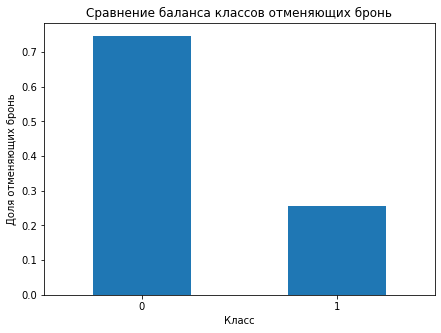

In [59]:
data_train.is_canceled.value_counts(normalize=True)\
.plot(kind='bar', rot=0, figsize=(7,5),\
      title='Сравнение баланса классов отменяющих бронь', ylabel='Доля отменяющих бронь', xlabel='Класс');

<q>
</q>

<hr style="border: 2px solid blue;">

## Шаг 4. Разработка модели ML

### Dummy переменные

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В теории тренажера в данный момент предлагается использовать get_dummies, однако, это впоследствии приводит к сложностям поэтому стоит использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. По аналогии с масштабированием делать fit только на трейне, а transform на всех выборках.
<hr>
get_dummies подходит для анализа данных, а для машинного обучения более предпочтителен OHE, т.к. он позоволяет избежать ряд ошибок при обучении моделей, в том числе может работать с неизвестными ранее уровнями категорий, которых не было изначально (например, если появится еще одна модель машины).
        
get_dummies также нельзя использовать вместе с pipeline, column_transformer, ecли появляется новая выборка и ее нужно кодировать, то обязательно стоит выполнить проверку, чтобы получившиеся фичи были такие же.
        
Посмотреть более подробно, как использовать OneHotEncoder можно здесь:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing

Перед нами задачи классификации - необходимо предсказывать столбец `is_canceled` по остальным.
Проверять на эффективность будем три модели:
1. Логистическая регрессия
2. Случайный лес
3. Модель максимальной прибыли

Ключевая метрика: Прибыль компании

Определяем признаки и цели. Сбрасываем созданные колонки из признаков

In [113]:
data_test = data.loc[test_indexes]
data_train = data.loc[train_indexes]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([44932, 44940, 45961, 46432, 46494,\n            ...\n            96093, 96146, 96170, 96307, 96910],\n           dtype='int64', name='id', length=69). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:
data_test_target = data_test.is_canceled
data_test_features = data_test.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)
data_train_target = data_train.is_canceled
data_train_features = data_train.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)


### Разбиваем на обучающую и валидационную выборки

In [ ]:
features_train, features_valid, target_train, target_valid = \
train_test_split(data_train_features, data_train_target, test_size=0.25, random_state=42, stratify=data_train_target)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Так как модели должны быть обучены и оценены с помощью кросс-валидации, то необязательно выделять валидационную выборку, чтобы модели досталось больше данных для обучения.

### Масштабирование признаков

In [ ]:
features_train, features_valid, data_test_features = \
features_scalling(features_train, features_valid, data_test_features)

### Логистическая регрессия

In [ ]:
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(features_train, target_train)
predictions_is_canceled = model.predict(data_test_features)
print(f'Точность логистической регрессии \n\
На валидационной выборке: {model.score(features_valid, target_valid):.1%}\n\
На тестовой выборке: {model.score(data_test_features, data_test_target):.1%}\n\
В сравнении с константной моделью, предсказывающий наиболее популярный класс:\
    {data_test_target.value_counts(normalize=True)[0]:.1%}')


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Модели стоит оценивать по результатам кросс-валидации. Кроме того в методе score идет рассчет accuracy, что в условиях дисбаласнса не является объективной метрикой. 

In [ ]:
print(classification_report(data_test_target, predictions_is_canceled))

Результаты неплохие, проверим, как увеличилась прибыль отеля при использовании депозита

In [ ]:
data_test.insert(0, 'pred_is_canceled', predictions_is_canceled)

Логика столбца new_profit:
1. Если клиент приехал `(is_canceled == 0)`, то прибыль будет такая же как и раньше (депозит учитывается)
2. Если клиент не приехал `(is_canceled == 1)` , но модель дает неверное предсказание `(pred_is_canceled == 0)`, тогда мы несем полные убытки, как и раньше (стоимость ночи + уборка)
3.  Если клиент не приехал `(is_canceled == 1)`, но модель дает верное предсказание `(pred_is_canceled == 1)`, тогда его депозит в (стоимость ночи + уборка) * 0.8 сгорает. И наши убытки составляют 20% от того, что было раньше

Проверочные данные в табличке

In [ ]:
data_test['new_profit'] = (1 - data_test.is_canceled) * data.profit + data_test.is_canceled * \
    (1-data_test.pred_is_canceled) * data_test.profit + data_test.is_canceled * data_test.pred_is_canceled * \
        data_test.profit * 0.2
data_test.loc[[97899, 6087, 6089], ['pred_is_canceled', 'is_canceled','stays_in_weekend_nights',\
    'stays_in_week_nights', 'room_price', 'season_coef', 'service_price', 'profit', 'new_profit']]

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Да, все верно.
    

In [ ]:
print(f'Прибыль отеля до внедрения модели: {data_test.profit.sum():,.0f}\n\
Прибыль отеля после внедрения модели: {data_test.new_profit.sum():,.0f} \n\
Прибыль увеличилась в {data_test.new_profit.sum() / data_test.profit.sum():.2f}раз ')


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Расчет прибыли после внедрения депозита мы делаем для лучшей модели, выбранной по результатам кросс-валидации.

### Случайный лес

Для работы модели случайного леса нет необходимости в масштабировании признаков. Реализуем ее:

In [ ]:
data_test = data.loc[test_indexes]
data_train = data.loc[train_indexes]
data_test_target = data_test.is_canceled
data_test_features = data_test.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)
data_train_target = data_train.is_canceled
data_train_features = data_train.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)
features_train, features_valid, target_train, \
    target_valid = train_test_split(data_train_features, data_train_target, \
        test_size=0.25, random_state=42, stratify=data_train_target)

In [ ]:
best_forest_model = None
best_profit_increase = 1
for depth in tqdm(range(5,15)):
    for est in range(1,101, 10):
        for leaf in range(1,5):
            #initialize model
            model = RandomForestClassifier(random_state=42, \
                max_depth=depth, n_estimators=est, min_samples_leaf=leaf, class_weight='balanced')
            model.fit(features_train, target_train)
            #predictions for valid features
            pred_is_canceled = model.predict(features_valid)
            # count new profit
            data_valid = data_train.loc[features_valid.index]
            data_valid['pred_is_canceled'] = pred_is_canceled
            data_valid['new_profit'] = (1 - data_valid.is_canceled) * data.profit \
                + data_valid.is_canceled * (1-data_valid.pred_is_canceled) * data_valid.profit \
                    + data_valid.is_canceled * data_valid.pred_is_canceled * data_valid.profit * 0.2
            if data_valid['new_profit'].sum() > data_valid['profit'].sum():
                best_forest_model = model
                best_profit_increase = data_valid['new_profit'].sum() / data_valid['profit'].sum()
                
print(f'Прибыль на валидационной выборке увеличилась в: {best_profit_increase:.2f} раз')
                

In [ ]:
predictions_test = best_forest_model.predict(data_test_features)

In [ ]:
print(classification_report(data_test_target, predictions_test))

In [ ]:
data_test['pred_is_canceled'] = predictions_test

In [ ]:
data_test['new_profit'] = (1 - data_test.is_canceled) * data.profit\
    + data_test.is_canceled * (1-data_test.pred_is_canceled) * data_test.profit\
        + data_test.is_canceled * data_test.pred_is_canceled * data_test.profit * 0.2

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Как минимум для 2х моделей стоит подобрать как минимум по 2 гиперпарметра

### Модель максимальной прибыли

В моем понимании задание получилось несколько неполное. Получается, что введенный депозит для клиента выгоден всегда, потому что:
1. Клиент приехал = прибыль не изменилась
2. Клиент не приехал = убытки меньше
В такой ситуации выгоднее всего просто сделать обязательный депозит `pred_is_cancelded = 1` для всех клиентов. Таким образом, мы максимизируем метрику recall и найдем всех "прогульщиков" и получим максимальную прибыль. Ведь нас никак не штрафуют за ошибки!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Да, но в таком случае можно отпугнуть потенциально новых клиентов и не проявить лояльности к старым. Людям будет проще забронировать гостиницу, где не будут постоянно требовать депозит.

In [ ]:
data_test = data.loc[test_indexes]
data_train = data.loc[train_indexes]

In [ ]:
data_test_target = data_test.is_canceled
data_test_features = data_test.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)
data_train_target = data_train.is_canceled
data_train_features = data_train.drop(['is_canceled', 'season_coef', 'room_price', 'revenue', 'profit'], axis=1)


In [ ]:
data_test['pred_is_canceled'] = 1
data_test['new_profit'] = (1 - data_test.is_canceled) \
    * data.profit + data_test.is_canceled * (1-data_test.pred_is_canceled) * \
        data_test.profit + data_test.is_canceled * data_test.pred_is_canceled * data_test.profit * 0.2
print(f'Прибыль компании до внедрения модели: {data_test.profit.sum():,.0f}\n\
Прибыль компании после внедрения модели: {data_test.new_profit.sum():,.0f}\n\
Прибыль за тестовый период увеличилась в \
    {data_test.new_profit.sum() / data_test.profit.sum():.2f} раза или на \
        {(data_test.new_profit.sum() - data_test.profit.sum()) / 10**6:.1f} млн руб')

In [ ]:
print(classification_report(data_test.is_canceled, data_test.pred_is_canceled))

### Вывод по блоку "разработка ML модели"
1. Введение депозита с рассмотренной точки зрения исключительно положительный шаг. Прибыль всегда получит неотрицательный рост. В реальной жизни депозиты могут отпугивать клиентов от бронирования отеля и нужно это учитывать.
2. Модель логистической регрессии оказалась предпочтительней для максимизации прибыли, в сравнении с моделью случайного леса. Она дала схожий с моделью случайного леса f1-score 0.68 и 0.68 соответственно. При этом метрика recall у логистической регрессии выше 0.85 против 0.62 у случайного леса. В противовес, модель случайного леса покала лучше результаты в точности (0.75 лес против 0.56 регрессия). Для нас важнее полнота (метрика recall)
3. Максимально прибыль удалось увеличить на 14.4 млн, выбрав константную модуль, сделав метрику recall = 1. Тогда f1-score становится 0.56, а точность нашей модели падает до 0.39 (доли отменяющих бронь)

## Шаг 5. Опишите портрет «ненадёжного» клиента

1. Забронировал отель как можно раньше до заезда
2. Собирается приехать в высокий сезон (Лучше всего июнь)
3. В бронировании указано, что проживать планируют 2 взрослых
4. Бронирование сделанно из Португалии
5. Бронирование сделано через туроперато или турагента
6. Забронировал наиболее дорогой тип комнаты (A)
7. Бронирование подтверждено не сразу
8. Не является корпоративным клиентом

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Этот анализ можно провести опираясь теперь на важность признаков для модели.

## Шаг 6. Напишите общий вывод

### Общий вывод

1. Разработана система прогнозирования отказа от брони, окупающаяся за тестовый период
2. Наиболее эффективной моделью с точки зрения максимизации прибыли оказалась модель тотального введения депозитов для каждого клиента. Прибыль получила прирост в 14.4 млн руб на тестовом периоде. При этом данныя модель имеет никую точность и ошибается чаще, чем дает верное предсказание
3. Оптимальной моделью на мой взгляд оказалась модель логистической регрессии. Позволяющая находить 85 % клиентов планирующих отменить бронь. Прибыль при использовании такой модели увеличивается на 38% или на 12.5 млн руб. При этом данная модель имеет точность дает верное предсказание по отмене брони в 56% случаев.
4. Модель случайного леса, показала высокие результаты с точки зрения точности 75%. При этом смогла найти только 62% клиентов планирующих отмену бронирования. Также, на обучение данной модели тратиться значительно больше времени в сравнении с остальными
5. Наиболее важными характеристиками ненадежного клиента оказались:
* Бронирование задолго до заезда
* Бронирование сделано из Португалии
* Подтверждение получено не сразу

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Ярослав, спасибо за работу! Проект хороший, продуманный, структурно выдержанный. Однако стоит внести некоторые исправления, чтобы можно было считать работу завершенной.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Есть первичный анализ данных
2. Есть описание клиента склонного к отмене брони
3. Предобработка данных проводится корректно
4. Исследовано 2 модели  ML
5. Расчет прибыли до и после внедрения депозитов верный

**Замечания, на которые стоит обратить внимание при будущей работе:**
    

   
 
    1. Стоит выбрать подходящую метрику и написать обоснование выбора метрики
    2. Стоит проверить целевую переменную на дисбаланс
    3. Стоит исправить функции расчета прибыли до и после внедрения системы депозитов
    4. Как минимум для 2х моделей стоит подобрать как минимум по 2 гиперпараметра
    5. Расчет прибыли и проверку на тестовой выборке стоит проводить только для лучшей модели
    6. Модели оценивать на кросс-валидации
    7. Обработать неявные дубликаты в строковых данных
    8. Исправить ошибку в коде



Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**